<a href="https://colab.research.google.com/github/gentilhimal/Stock-Prediction/blob/main/multivariate_GRU_FORD_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict 
#the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote 
dataset = web.DataReader('F', data_source='yahoo', start='2012-01-01', end='2020-11-24') 
#Show the data 
data=dataset.drop(['High', 'Low','Open','Adj Close'], axis=1)
data

,Close,Volume
Date,,
2012-01-03,11.13,45709900.0
2012-01-04,11.30,79725200.0
2012-01-05,11.59,67877500.0
2012-01-06,11.71,59840700.0
2012-01-09,11.80,53981500.0
...,...,...
2020-11-18,8.82,77759300.0
2020-11-19,8.82,56672700.0
2020-11-20,8.74,57024300.0


In [ ]:
y_data=dataset.filter(['Close']).values
y_test=y_data
y_data

array([[11.13000011],
       [11.30000019],
       [11.59000015],
       ...,
       [ 8.73999977],
       [ 8.85999966],
       [ 9.44999981]])

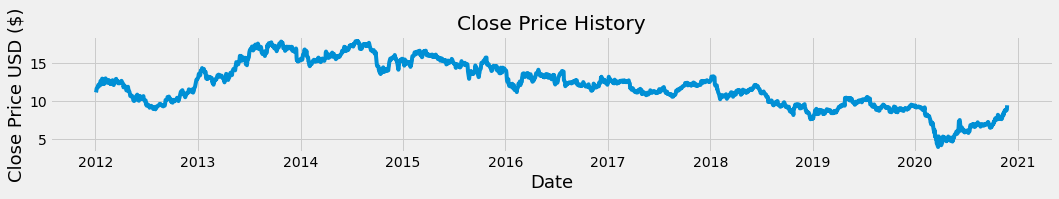

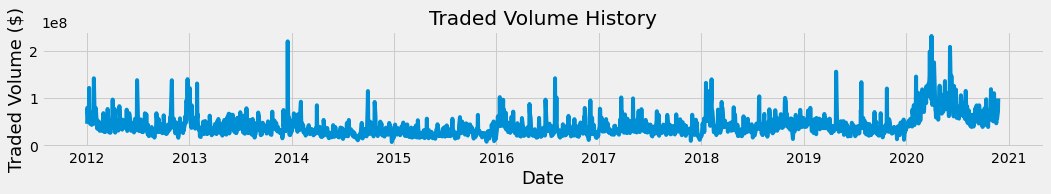

In [ ]:
#Visualize the closing price history

plt.figure(figsize=(16,2))
plt.title('Close Price History')
plt.plot(dataset['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

plt.figure(figsize=(16,2))
plt.title('Traded Volume History')
plt.plot(dataset['Volume'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Traded Volume ($)',fontsize=18)
plt.show()

In [ ]:
# Converting the dataframe to a numpy array
dataset = data.values

#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1792

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
y_data=scaler.fit_transform(y_data)
len(y_data)

2240

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len, : ]
print(len(train_data))
#Split the data into x_train and y_train data sets
x_train=train_data
y_train_data=[]
for i in range(60,len(train_data)):
     y_train_data.append(y_data[i,0])
y_train_data

1792


[0.6138828501774193,
 0.6124366854721406,
 0.6225596315383064,
 0.6240057962435851,
 0.6146059325300587,
 0.6117136720764297,
 0.5936370270020161,
 0.5625451754078079,
 0.5712219567686949,
 0.5827909985832109,
 0.5719450391213343,
 0.5690527786677053,
 0.5712219567686949,
 0.5625451754078079,
 0.5531453116942814,
 0.535068666619868,
 0.5307303104178887,
 0.5336225708715177,
 0.5582067502489001,
 0.5683296963150659,
 0.5488069554923022,
 0.5256688029063414,
 0.522053460100073,
 0.5126536653434751,
 0.4996384588236803,
 0.4815618137492669,
 0.4808387313966275,
 0.47722338859035907,
 0.48300790949761707,
 0.4844540742028959,
 0.47505421048936947,
 0.45625448306231653,
 0.4439623588951611,
 0.4446854412478005,
 0.4338394817859238,
 0.4338394817859238,
 0.4475777017014295,
 0.4468546193487901,
 0.46276208632221394,
 0.47577729284200876,
 0.47650037519464816,
 0.4938539379164223,
 0.4808387313966275,
 0.47360811474101916,
 0.4417931807941714,
 0.4360086598869134,
 0.4468546193487901,
 0.4743

In [ ]:
x_final=np.empty((1,2))
for i in range(60,len(train_data)):
    x_final=np.concatenate((x_final,x_train[i-60:i]),axis=0)
x_final = np.delete(x_final, (0), axis=0)
x_final.shape
print(x_final)

[[0.51482284 0.17172189]
 [0.52711497 0.32312171]
 [0.54808387 0.27038839]
 ...
 [0.32176427 0.08504086]
 [0.31814893 0.08925945]
 [0.31887201 0.07317823]]


In [ ]:
x_train=x_final

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train_data)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (1732,60,x_train.shape[1]))

In [ ]:
x_train[0]

array([[0.51482284, 0.17172189],
       [0.52711497, 0.32312171],
       [0.54808387, 0.27038839],
       [0.55676065, 0.23461713],
       [0.56326826, 0.20853822],
       [0.56326826, 0.51017394],
       [0.582791  , 0.25226642],
       [0.58785251, 0.18497588],
       [0.58062182, 0.17464526],
       [0.57917572, 0.16588449],
       [0.60231381, 0.17792115],
       [0.62183655, 0.28381552],
       [0.62039045, 0.16280133],
       [0.62545189, 0.18805592],
       [0.63702093, 0.17198227],
       [0.6449747 , 0.20871671],
       [0.63485176, 0.30418521],
       [0.59291394, 0.60099389],
       [0.59869847, 0.22532314],
       [0.60809833, 0.17484733],
       [0.60159073, 0.2872641 ],
       [0.59652929, 0.18346211],
       [0.63485176, 0.31923159],
       [0.64714388, 0.17463013],
       [0.64135936, 0.14369703],
       [0.6384671 , 0.1256218 ],
       [0.62762107, 0.2010117 ],
       [0.60954443, 0.20196865],
       [0.61677511, 0.12171343],
       [0.61243669, 0.14465131],
       [0.

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(GRU(units=50, return_sequences=True,input_shape=(x_train.shape[1],2)))
model.add(GRU(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
history=model.fit(x_train, y_train, batch_size=1, epochs=4)


Epoch 1/4
1732/1732 [==============================] - 40s 22ms/step - loss: 0.0057
Epoch 2/4
1732/1732 [==============================] - 38s 22ms/step - loss: 7.0897e-04
Epoch 3/4
1732/1732 [==============================] - 38s 22ms/step - loss: 5.4526e-04
Epoch 4/4
1732/1732 [==============================] - 38s 22ms/step - loss: 5.3252e-04


Text(0, 0.5, 'MSE')

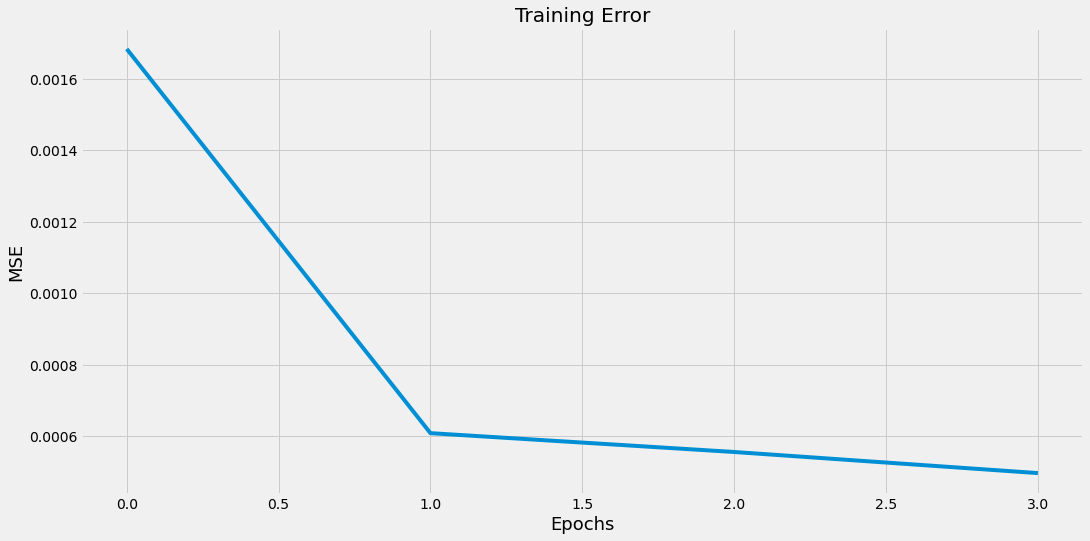

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(history.history['loss'], label='train')
plt.title('Training Error')
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE', fontsize=18)

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test =  test_data #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
x_final_test=np.empty((1,2))
y_test =  y_test[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_final_test=np.concatenate((x_final_test,test_data[i-60:i]),axis=0)
x_final_test = np.delete(x_final_test, (0), axis=0)
x_test=x_final_test
print(len(y_test))
print(len(x_test))

448
26880


In [ ]:
#Convert x_test to a numpy array 
y_test = np.array(y_test)
y_test

array([[ 8.82999992],
       [ 8.93999958],
       [ 8.71000004],
       [ 8.71000004],
       [ 8.76000023],
       [ 8.88000011],
       [ 8.77999973],
       [ 8.77000046],
       [ 8.78999996],
       [ 8.81000042],
       [ 8.77000046],
       [ 8.57999992],
       [ 8.47999954],
       [ 8.42000008],
       [ 8.60999966],
       [ 8.56999969],
       [ 8.52999973],
       [ 8.40999985],
       [ 8.43000031],
       [ 8.56999969],
       [ 8.69999981],
       [ 8.51000023],
       [ 8.68999958],
       [ 8.53999996],
       [ 8.51000023],
       [ 8.76000023],
       [ 8.61999989],
       [ 8.77000046],
       [ 8.77999973],
       [ 8.97999954],
       [ 9.01000023],
       [ 9.13000011],
       [ 9.23999977],
       [ 9.25      ],
       [ 9.30000019],
       [ 9.21000004],
       [ 9.32999992],
       [ 9.39000034],
       [ 9.44999981],
       [ 9.32999992],
       [ 9.35999966],
       [ 9.5       ],
       [ 9.55000019],
       [ 9.5       ],
       [ 9.5       ],
       [ 9

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (448,60,x_test.shape[1]))
print(x_test)
print(y_test[62])

[[[0.37888646 0.21882433]
  [0.36514824 0.12476455]
  [0.36876352 0.08347235]
  ...
  [0.31814893 0.08925945]
  [0.31887201 0.07317823]
  [0.32754879 0.22678171]]

 [[0.36514824 0.12476455]
  [0.36876352 0.08347235]
  [0.37020968 0.02845036]
  ...
  [0.31887201 0.07317823]
  [0.32754879 0.22678171]
  [0.34851769 0.13709051]]

 [[0.36876352 0.08347235]
  [0.37020968 0.02845036]
  [0.38973242 0.17436797]
  ...
  [0.32754879 0.22678171]
  [0.34851769 0.13709051]
  [0.35647139 0.214482  ]]

 ...

 [[0.20968906 0.17185987]
  [0.21185827 0.14602665]
  [0.20318149 0.19121519]
  ...
  [0.34273317 0.17637133]
  [0.34779461 0.31437162]
  [0.34779461 0.22051658]]

 [[0.21185827 0.14602665]
  [0.20318149 0.19121519]
  [0.20390453 0.18286836]
  ...
  [0.34779461 0.31437162]
  [0.34779461 0.22051658]
  [0.34201009 0.22208152]]

 [[0.20318149 0.19121519]
  [0.20390453 0.18286836]
  [0.21258132 0.23091484]
  ...
  [0.34779461 0.22051658]
  [0.34201009 0.22208152]
  [0.35068687 0.28667702]]]
[10.289999

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling
predictions.shape

(448, 1)

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.20916044693005784

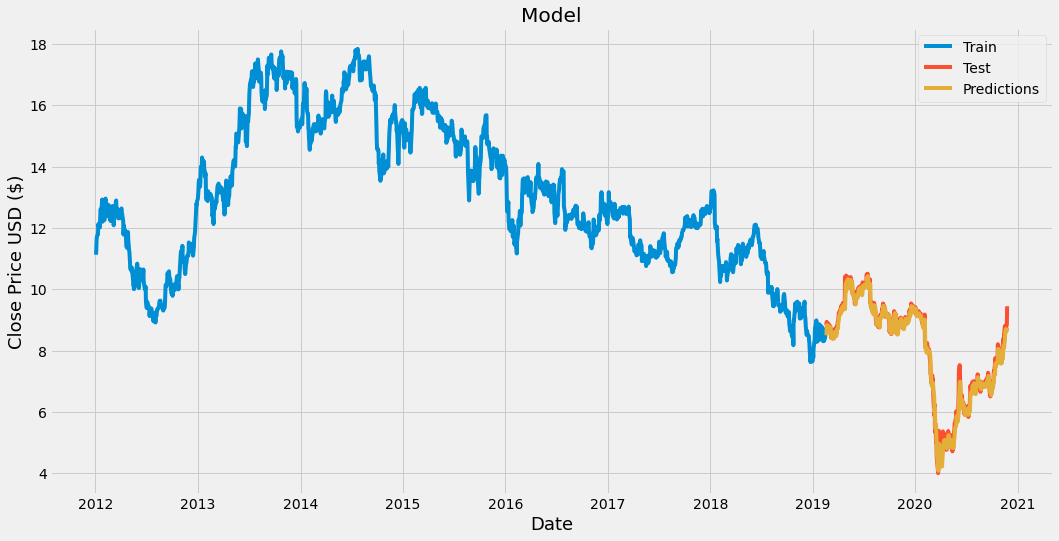

            Close  predictions
Date                          
2019-02-19   8.83     8.503747
2019-02-20   8.94     8.720499
2019-02-21   8.71     8.837604
2019-02-22   8.71     8.660950
2019-02-25   8.76     8.667535
...           ...          ...
2020-11-18   8.82     8.577338
2020-11-19   8.82     8.695451
2020-11-20   8.74     8.691237
2020-11-23   8.86     8.653011
2020-11-24   9.45     8.750618

[448 rows x 2 columns]


In [ ]:
# #Plot/Create the data for the graph
train = data[:training_data_len]
test = data[training_data_len:]
train=train['Close']
test=test['Close']
valid=pd.DataFrame(test)
valid['predictions']=predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()
print(valid)

In [ ]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-02-19,8.83,8.503747
2019-02-20,8.94,8.720499
2019-02-21,8.71,8.837604
2019-02-22,8.71,8.660950
2019-02-25,8.76,8.667535
...,...,...
2020-11-18,8.82,8.577338
2020-11-19,8.82,8.695451
2020-11-20,8.74,8.691237


In [ ]:
#Get the quote
apple_quote = web.DataReader('F', data_source='yahoo', start='2012-01-01', end='2020-11-24')
#Create a new dataframe
new_df = apple_quote.drop(['High', 'Low','Open','Adj Close'], axis=1)
x_final_test=np.empty((1,2))
x_final_test=np.concatenate((x_final_test,new_df[-60:]),axis=0)
x_final_test = np.delete(x_final_test, (0), axis=0)
test_data=x_final_test
#Scale the data to be values between 0 and 1
test_data_scaled = scaler.transform(test_data)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test=test_data_scaled
#Reshape the data
X_test = np.reshape(X_test, (1,60,X_test.shape[1]))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(X_test)
pred_price

[[[2.03904534e-01 3.48620363e+06]
  [2.12581316e-01 4.26673148e+06]
  [2.03181486e-01 5.64937790e+06]
  [2.08966007e-01 5.06272570e+06]
  [2.18365871e-01 6.12793178e+06]
  [2.14027446e-01 4.08542273e+06]
  [2.09689055e-01 5.00568303e+06]
  [2.16196659e-01 3.98268954e+06]
  [2.24873440e-01 4.24470689e+06]
  [2.19088919e-01 4.71428029e+06]
  [2.17642789e-01 3.34387536e+06]
  [2.36442516e-01 6.13522028e+06]
  [2.32827173e-01 5.20096865e+06]
  [2.06796795e-01 5.26755578e+06]
  [2.00289226e-01 4.03944297e+06]
  [1.90166280e-01 3.80250154e+06]
  [1.91612410e-01 4.32558903e+06]
  [1.80766451e-01 3.88733162e+06]
  [1.93781623e-01 3.44053480e+06]
  [1.87274020e-01 2.81903805e+06]
  [1.91612410e-01 4.04516242e+06]
  [1.98120013e-01 4.21840899e+06]
  [2.08242925e-01 4.39612410e+06]
  [2.17642789e-01 3.06286307e+06]
  [2.14750528e-01 5.65464905e+06]
  [2.32827173e-01 3.66334752e+06]
  [2.41503955e-01 3.94167001e+06]
  [2.34273304e-01 3.68603733e+06]
  [2.64642073e-01 7.06383923e+06]
  [2.71149676e

array([[3.8597612]], dtype=float32)

In [ ]:
#Get the quote
apple_quote2 = web.DataReader('F', data_source='yahoo', start='2020-11-25', end='2020-11-25')
print(apple_quote2['Close'])

Date
2020-11-25    9.08
Name: Close, dtype: float64


In [ ]:
X_test.shape[0]

1

In [ ]:
X_test.shape[1]

60